In [2]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"3b865713af85f5da0dba3b577e289484"}
def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)
    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()
    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically
    return r

In [3]:
r = get(baseUrl)

In [4]:
r.keys()

dict_keys(['simulations'])

In [5]:
len(r['simulations'])

45

In [6]:
print(r['simulations'][0])
names = [sim['name'] for sim in r['simulations']]
print('Available', names)

{'name': 'Illustris-1', 'num_snapshots': 134, 'url': 'http://www.tng-project.org/api/Illustris-1/'}
Available ['Illustris-1', 'Illustris-1-Dark', 'Illustris-2', 'Illustris-2-Dark', 'Illustris-3', 'Illustris-3-Dark', 'TNG100-1', 'TNG100-1-Dark', 'TNG100-2', 'TNG100-2-Dark', 'TNG100-3', 'TNG100-3-Dark', 'TNG300-3', 'TNG300-2-Dark', 'TNG300-2', 'TNG300-1-Dark', 'TNG300-1', 'TNG300-3-Dark', 'Illustris-1-Subbox0', 'Illustris-1-Subbox1', 'Illustris-1-Subbox2', 'Illustris-1-Subbox3', 'Illustris-2-Subbox0', 'Illustris-2-Subbox1', 'Illustris-2-Subbox2', 'Illustris-2-Subbox3', 'Illustris-3-Subbox0', 'Illustris-3-Subbox1', 'Illustris-3-Subbox2', 'Illustris-3-Subbox3', 'TNG100-1-Subbox0', 'TNG100-1-Subbox1', 'TNG100-2-Subbox0', 'TNG100-2-Subbox1', 'TNG100-3-Subbox0', 'TNG100-3-Subbox1', 'TNG300-3-Subbox1', 'TNG300-3-Subbox2', 'TNG300-3-Subbox0', 'TNG300-2-Subbox1', 'TNG300-2-Subbox2', 'TNG300-2-Subbox0', 'TNG300-1-Subbox1', 'TNG300-1-Subbox2', 'TNG300-1-Subbox0']


In [7]:
i = names.index('TNG100-1')

In [8]:
sim = get( r['simulations'][i]['url'] )

In [9]:
sim.keys()

dict_keys(['name', 'description', 'name_alt', 'boxsize', 'z_start', 'z_final', 'cosmology', 'omega_0', 'omega_L', 'omega_B', 'hubble', 'physics_model', 'has_cooling', 'has_starformation', 'has_winds', 'has_blackholes', 'mass_gas', 'mass_dm', 'softening_dm_comoving', 'softening_stars_comoving', 'softening_blackholes_comoving', 'softening_gas_comoving', 'softening_dm_max_phys', 'softening_stars_max_phys', 'softening_blackholes_max_phys', 'softening_gas_max_phys', 'softening_gas_factor', 'softening_gas_comoving_min', 'num_dm', 'num_tr_mc', 'num_tr_vel', 'longids', 'is_uniform', 'is_zoom', 'is_subbox', 'num_files_snapshot', 'num_files_groupcat', 'num_files_rockstar', 'num_files_lhalotree', 'num_files_sublink', 'num_files_ctrees', 'filesize_lhalotree', 'filesize_sublink', 'filesize_ctrees', 'filesize_ics', 'filesize_simulation', 'has_fof', 'has_subfind', 'has_rockstar', 'has_lhalotree', 'has_sublink', 'has_ctrees', 'permission_required', 'num_snapshots', 'url', 'parent_simulation', 'child_s

In [10]:
sim['snapshots']

'http://www.tng-project.org/api/TNG100-1/snapshots/'

In [11]:
snaps = get( sim['snapshots'] )

In [12]:
print(len(snaps))

100


In [13]:
snaps[-2]# this is the one at z=0

{'number': 98,
 'redshift': 0.00952166696794476,
 'num_groups_subfind': 4378491,
 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/'}

In [14]:
snap = get( snaps[-2]['url'] ) # you can also download these things here - 
#https://www.illustris-project.org/data/downloads/Illustris-3/

In [15]:
snap

{'simulation': 'http://www.tng-project.org/api/TNG100-1/',
 'number': 98,
 'redshift': 0.00952166696794476,
 'num_gas': 5455189750,
 'num_dm': 6028568000,
 'num_trmc': 0,
 'num_stars': 452205927,
 'num_bhs': 36733,
 'num_groups_fof': 6303326,
 'num_groups_subfind': 4378491,
 'num_groups_rockstar': 0,
 'filesize_snapshot': 521948823396.0,
 'filesize_groupcat': 4453965672.0,
 'filesize_rockstar': 0.0,
 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/',
 'subhalos': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/subhalos/',
 'vis': {'groupcat_sfms': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0',
  'groupcat_sizemass': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars',
  'groupcat_mz_gas': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas',
  'groupcat_mz_stars': 'http://www.tng-project.o

In [16]:
# grab the subhalos
subs = get( snap['subhalos'] )
print(subs.keys())

dict_keys(['count', 'next', 'previous', 'results'])


In [17]:
print(subs['results'])

[{'id': 0, 'sfr': 1.40367, 'mass_log_msun': 14.601248216708818, 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/subhalos/0/'}, {'id': 1, 'sfr': 0.278222, 'mass_log_msun': 13.74088459690506, 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/subhalos/1/'}, {'id': 2, 'sfr': 14.3951, 'mass_log_msun': 13.097592653374768, 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/subhalos/2/'}, {'id': 3, 'sfr': 6.22572, 'mass_log_msun': 12.72630215404047, 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/subhalos/3/'}, {'id': 4, 'sfr': 1.29808, 'mass_log_msun': 12.684500026462977, 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/subhalos/4/'}, {'id': 5, 'sfr': 0.892944, 'mass_log_msun': 12.666184027797218, 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/subhalos/5/'}, {'id': 6, 'sfr': 1.98932, 'mass_log_msun': 12.514410880468052, 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/98/subhalos/6/'}, {'id': 7, 'sfr': 2.38205, 

In [18]:
# can modify the restrictions on the length of number of subhalos:
#subs = get( snap['subhalos'], {'limit':220} )

# The ordering is random unless otherwise specified:
subs = get( snap['subhalos'], {'limit':20, 'order_by':'-mass_stars'} )
# Negative is descending order, otherwise ascending?

In [19]:
print([ subs['results'][i]['id'] for i in range(5) ])

[0, 31158, 68598, 17200, 82416]


In [20]:
sub = get( subs['results'][1]['url'] )

In [21]:
sub # this is the info for the second most massive subhalo

{'snap': 98,
 'id': 31158,
 'bhmdot': 0.00181804,
 'cm_x': 10963.4,
 'cm_y': 50830.9,
 'cm_z': 47608.4,
 'gasmetallicity': 0.00584247,
 'gasmetallicityhalfrad': 0.00614362,
 'gasmetallicitymaxrad': 0.00417512,
 'gasmetallicitysfr': 0.013224,
 'gasmetallicitysfrweighted': 0.0138786,
 'pos_x': 10879.0,
 'pos_y': 50869.3,
 'pos_z': 47578.6,
 'halfmassrad': 511.966,
 'halfmassrad_gas': 524.054,
 'halfmassrad_dm': 513.168,
 'halfmassrad_stars': 57.7242,
 'halfmassrad_bhs': 0.0,
 'len': 74597135,
 'len_gas': 32799392,
 'len_dm': 38786628,
 'len_stars': 3011112,
 'len_bhs': 3,
 'mass': 23098.1,
 'mass_gas': 3295.88,
 'mass_dm': 19609.5,
 'mass_stars': 191.82,
 'mass_bhs': 0.838334,
 'massinhalfrad': 661.511,
 'massinhalfrad_gas': 18.6267,
 'massinhalfrad_dm': 546.136,
 'massinhalfrad_stars': 95.9098,
 'massinhalfrad_bhs': 0.838334,
 'massinmaxrad': 13513.0,
 'massinmaxrad_gas': 1954.22,
 'massinmaxrad_dm': 11380.1,
 'massinmaxrad_stars': 177.842,
 'massinmaxrad_bhs': 0.838334,
 'massinrad': 1

In [22]:
# Try to look at this galaxy and its descendent in imaging
print()
print('Progenitors', sub['prog_snap'], sub['prog_sfid'])
print('Descendents', sub['desc_snap'],sub['desc_sfid'])


Progenitors 97 30615
Descendents 99 31342


In [23]:
sub['related']['sublink_progenitor']

'http://www.tng-project.org/api/TNG100-1/snapshots/97/subhalos/30615/'

In [24]:
snap_prog = get( sub['related']['sublink_progenitor'])


In [25]:
print(snap_prog)

{'snap': 97, 'id': 30615, 'bhmdot': 0.0293793, 'cm_x': 10923.6, 'cm_y': 50844.5, 'cm_z': 47598.7, 'gasmetallicity': 0.00589963, 'gasmetallicityhalfrad': 0.00645494, 'gasmetallicitymaxrad': 0.00411132, 'gasmetallicitysfr': 0.0129335, 'gasmetallicitysfrweighted': 0.0133791, 'pos_x': 10845.5, 'pos_y': 50889.3, 'pos_z': 47560.8, 'halfmassrad': 496.724, 'halfmassrad_gas': 497.726, 'halfmassrad_dm': 500.396, 'halfmassrad_stars': 65.1498, 'halfmassrad_bhs': 0.0, 'len': 74029670, 'len_gas': 32408138, 'len_dm': 38555474, 'len_stars': 3066051, 'len_bhs': 7, 'mass': 22944.6, 'mass_gas': 3255.56, 'mass_dm': 19492.7, 'mass_stars': 195.548, 'mass_bhs': 0.838223, 'massinhalfrad': 756.603, 'massinhalfrad_gas': 24.3844, 'massinhalfrad_dm': 633.607, 'massinhalfrad_stars': 97.7741, 'massinhalfrad_bhs': 0.837452, 'massinmaxrad': 14008.8, 'massinmaxrad_gas': 2060.97, 'massinmaxrad_dm': 11763.6, 'massinmaxrad_stars': 183.447, 'massinmaxrad_bhs': 0.838079, 'massinrad': 2024.45, 'massinrad_gas': 130.042, 'mas

In [26]:

id = 109974
url = "http://www.tng-project.org/api/TNG100-1/snapshots/68/subhalos/" + str(id)
sub = get(url) # get json response of subhalo properties

# prepare dict to hold result arrays
fields = ['snap','id','mass_gas','mass_stars','mass_dm','mass_bhs']
r = {}
for field in fields:
    r[field] = []
 
while sub['desc_sfid'] != -1:# so basically walking to present day
    for field in fields:
        r[field].append(sub[field])
    # request the full subhalo details of the descendant by following the sublink URL
    sub = get(sub['related']['sublink_descendant'])
    # so I think this follows you through the descendents
    # you can also get progenitors using 'sublink_progenitor'

# make a plot (notice our subhalo falls into a much more massive halo around snapshot 105)
for partType in ['gas','dm','stars','bhs']:
    mass_logmsun = np.log10( np.array(r['mass_'+partType])*1e10/0.704)
    plt.plot(r['snap'],mass_logmsun,label=partType)
    
plt.xlabel('Snapshot Number')
plt.ylabel('Mass [log $M_\odot$]')
plt.legend(loc='lower right');

KeyboardInterrupt: 

In [ ]:
# make a plot (notice our subhalo falls into a much more massive halo around snapshot 105)
sns.set_context("talk")
plt.clf()
fig=plt.figure(figsize=(4,3))
for partType in ['gas','dm','stars','bhs']:
    mass_logmsun = np.log10( np.array(r['mass_'+partType])*1e10/0.704)
    plt.plot(r['snap'],mass_logmsun,label=partType)
    if partType=='stars':
        for j in range(len(mass_logmsun)):
            #print('id', r['id'][j])
            plt.annotate(str(r['id'][j]), xy=(r['snap'][j], mass_logmsun[j]), xycoords='data', color='red', size=10)


plt.xlabel('Snapshot Number')
plt.ylabel('Mass [log $M_\odot$]')
plt.xlim([80,85])
#plt.legend(loc='lower right')
plt.show()

In [31]:
def get(path, params=None):
    # make HTTP GET request to path
    headers = {"api-key":"3b865713af85f5da0dba3b577e289484"}
    r = requests.get(path, params=params, headers=headers)
    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string
    return r

[68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98] [109974, 112238, 111850, 116953, 119774, 128871, 130359, 132504, 585890, 448800, 450644, 151019, 151856, 161411, 652272, 656768, 660174, 666915, 670745, 684734, 687591, 693683, 699942, 706410, 710100, 712858, 715071, 715624, 715072, 715180, 214152]
id 109974 snap 68
id 112238 snap 69
id 111850 snap 70
id 116953 snap 71
id 119774 snap 72
id 128871 snap 73
id 130359 snap 74
id 132504 snap 75
id 585890 snap 76
id 448800 snap 77
id 450644 snap 78
id 151019 snap 79
id 151856 snap 80


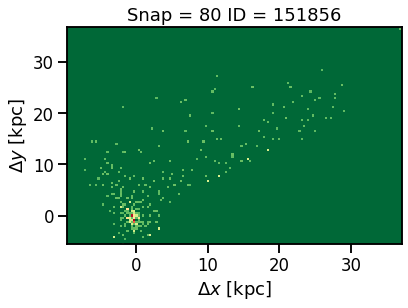

id 161411 snap 81


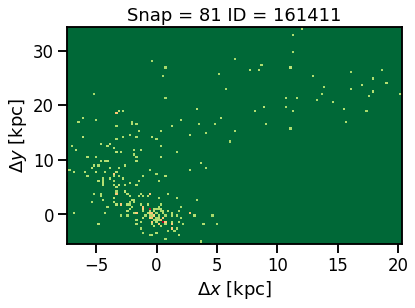

id 652272 snap 82


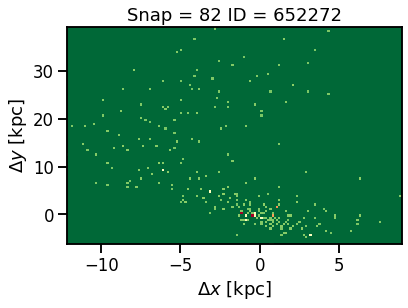

id 656768 snap 83


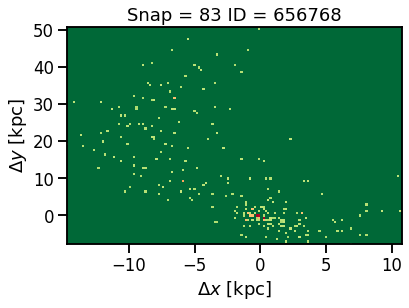

id 660174 snap 84


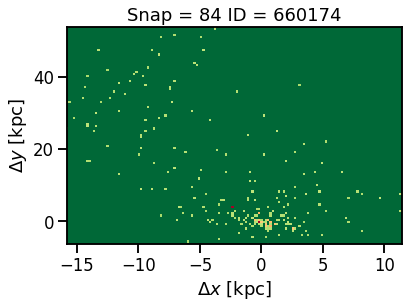

id 666915 snap 85


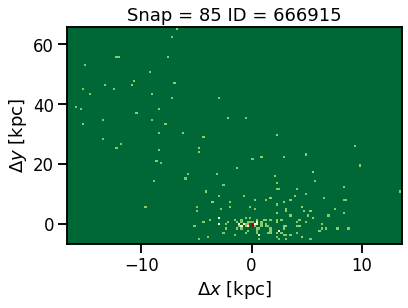

id 670745 snap 86


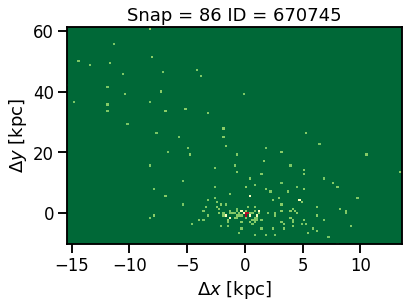

id 684734 snap 87


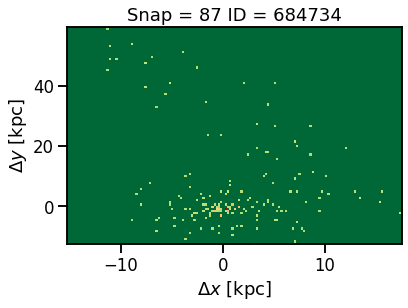

id 687591 snap 88


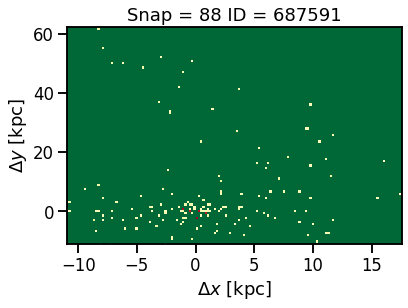

id 693683 snap 89


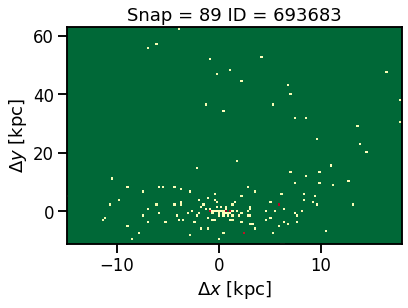

id 699942 snap 90


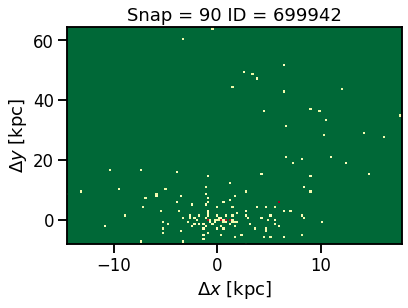

id 706410 snap 91
id 710100 snap 92
id 712858 snap 93
id 715071 snap 94
id 715624 snap 95
id 715072 snap 96
id 715180 snap 97
id 214152 snap 98


In [29]:
# Okay now plot the snapshot for the above before and after case :)
#['snap','id','mass_gas','mass_stars','mass_dm','mass_bhs']


'''snaplist = np.arange(0,100)[::-1]
redshift = np.array([20,15,12,11,10,9.4,9,8.5,8,7.6,7.2,7,6.5,6,5.8,5.5,5.2,5,4.7,4.4,
                     4.2,4,3.7,3.5,3.3,3,2.9,2.7,2.6,2.4,2.3,2.2,2.1,2,1.9,1.8,1.7,1.7,1.6,1.5,
                     1.5,1.4,1.4,1.3,1.3,1.2,1.2,1.1,1.1,1,1,0.96,0.92,0.88,0.85,0.82,0.79,0.76,0.73,0.7,
                     0.67,0.65,0.62,0.6,0.57,0.55,0.53,0.5,0.48,0.46,0.44,0.42,
                     0.4,0.38,0.36,0.35,0.33,0.31,0.3,0.28,0.26,0.24,0.23,0.21,0.2,0.18,0.17,
                     0.15,0.14,0.13,0.11,0.1,0.086,0.073,0.06,0.048,0.035,0.023,0.012,0])[::-1]
print('snaps', snaplist)
print('redshift', redshift)
STOP'''

import h5py
print(r['snap'], r['id'])

ids = r['id']
snaps = r['snap']

little_h = 0.704

cutout_request = {'gas':'Coordinates,Masses'}#was {'gas':'Coordinates,Masses'}
#{'stars':'Coordinates,GFM_Metallicity'}

# it is of course possible this data product does not exist for all requested subhalos
for j in range(len(ids)):
    
    idj = ids[j]
    snap = snaps[j]
    
    print('id', idj, 'snap', snap)
    if snap <80 or snap > 90:
        continue
        
    redshift_url = "http://www.tng-project.org/api/TNG100-1/snapshots/"+str(snap)
    scale_factor =  1 / (1 + get(redshift_url)['redshift'])
    
    sub_prog_url = "http://www.tng-project.org/api/TNG100-1/snapshots/"+str(snap)+"/subhalos/" + str(idj)
    sub_prog = get(sub_prog_url)
    
    cutout = get(sub_prog_url+"/cutout.hdf5", cutout_request)
    with h5py.File(cutout,'r') as f:
        x = f['PartType0']['Coordinates'][:,0] - sub_prog['pos_x']
        y = f['PartType0']['Coordinates'][:,1] - sub_prog['pos_y']
        
        x *= scale_factor/little_h
        y *= scale_factor/little_h
        #rr *= scale_factor/little_h # ckpc/h -> physical kpc
        #scale_factor = 1.0 / (1+redshift)
        #little_h = 0.704
        dens = np.log10(f['PartType0']['Masses'][:])
    plt.hist2d(x,y,weights=dens,bins=[150,100], cmap='RdYlGn')
    plt.xlabel('$\Delta x$ [kpc]')
    plt.ylabel('$\Delta y$ [kpc]');
    plt.title('Snap = '+str(snap)+' ID = '+str(idj))
    plt.show()

### The main question that I have is how to load a tree so I can then walk through it

In [30]:
i = names.index('TNG100-1')#Illustris-1')
baseUrl = 'http://www.tng-project.org/api/'
r = get(baseUrl)
sim = get( r['simulations'][i]['url'] )
snaps = get( sim['snapshots'] )
snaps[-1]

{'number': 99,
 'redshift': 2.22044604925031e-16,
 'num_groups_subfind': 4371211,
 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/'}

In [31]:
snap = get( snaps[-1]['url'] )# -1 is redshift zero
#print(snap)
print(snap['number'])
subs = get( snap['subhalos'], {'limit':3, 'order_by':'-mass_stars'} )
# limit to one to make it smaller, this is 
sub = get( subs['results'][2]['url'] )
print(sub)


99
{'snap': 99, 'id': 17185, 'bhmdot': 9.72462e-05, 'cm_x': 19809.4, 'cm_y': 47835.8, 'cm_z': 48903.6, 'gasmetallicity': 0.00436775, 'gasmetallicityhalfrad': 0.0045686, 'gasmetallicitymaxrad': 0.00359437, 'gasmetallicitysfr': 0.0087547, 'gasmetallicitysfrweighted': 0.00880867, 'pos_x': 19755.3, 'pos_y': 47555.0, 'pos_z': 48920.6, 'halfmassrad': 682.504, 'halfmassrad_gas': 685.717, 'halfmassrad_dm': 684.591, 'halfmassrad_stars': 88.3385, 'halfmassrad_bhs': 0.0, 'len': 84913532, 'len_gas': 35544745, 'len_dm': 46946727, 'len_stars': 2422056, 'len_bhs': 4, 'mass': 27463.6, 'mass_gas': 3573.19, 'mass_dm': 23735.1, 'mass_stars': 154.816, 'mass_bhs': 0.558348, 'massinhalfrad': 839.234, 'massinhalfrad_gas': 24.8743, 'massinhalfrad_dm': 736.394, 'massinhalfrad_stars': 77.4079, 'massinhalfrad_bhs': 0.557978, 'massinmaxrad': 20546.2, 'massinmaxrad_gas': 2870.99, 'massinmaxrad_dm': 17528.6, 'massinmaxrad_stars': 146.032, 'massinmaxrad_bhs': 0.558218, 'massinrad': 2195.78, 'massinrad_gas': 128.053,

In [32]:
url_json = sub['trees']['sublink_simple']
url_tree_png = sub['vis']['mergertree_sublink']

#url_skirt = sub['supplementary_data']['stellar_mocks']['image_subhalo']
#['supplementary_data']['skirt_images']['image_g_sdss']

url_tree = sub['trees']['sublink']#was 'sublink_mpb'
def get(path, params=None):
    # make HTTP GET request to path
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r

In [99]:
import illustris_python as ill
# Get them images:
import matplotlib.image as mpimg
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import BytesIO ## for Python 3

#using the json file you can
#retrieve a simple representation of the SubLink tree, 
#the Main Progenitor Branch (in 'Main') and a list of past mergers (in 'Mergers') only. 
#In both cases a snapshot number and subfind ID pair is given.
i = names.index('TNG100-1')#Illustris-1')
baseUrl = 'http://www.tng-project.org/api/'
r = get(baseUrl)
sim = get( r['simulations'][i]['url'] )
snaps = get( sim['snapshots'] )


print(snaps[99])
snap = get( snaps[-1]['url'] )# -1 is redshift zero
subs = get( snap['subhalos'], {'limit':3, 'order_by':'-mass_stars'} )
sub = get( subs['results'][2]['url'] )
print('checking if this is a url', subs['results'][2]['url'])
print(sub['vis'])
stars = get(sub['vis']['galaxy_stellar_light'])

print(sub['supplementary_data']['skirt_images'])

# This only works for z = 0 and z= 0.05
# But you can get various morphological measurements for the galaxy:
if 'skirt_images' in sub['supplementary_data']: 
    # download PNG image, the version which includes all stars in the FoF halo (try replacing 'fof' with 'gz')
    png_url = sub['supplementary_data']['skirt_images']['image_g_sdss']
    
    response = get(png_url)
    

url_json = sub['trees']['sublink_simple']


tree_simple = get(url_json)
fields = ['SubhaloID','NextProgenitorID','MainLeafProgenitorID','FirstProgenitorID','SubhaloMassType']


print(len(tree_simple['Mergers']))# This is the number of mergers in the merger tree
#print(tree_simple['Mergers'])


snapnumber=98
gal=0
list_mergers = []

for j in range(len(tree_simple['Mergers'])):
    if gal > 5:
        break
    if tree_simple['Mergers'][j][0] ==snapnumber:
        #Then this means it happened at the redshift one before
        idj = tree_simple['Mergers'][j][1]
        print(snapnumber, idj)
        snap = get(snaps[snapnumber]['url'])
        sub_prog_url = "http://www.tng-project.org/api/TNG100-1/snapshots/"+str(snapnumber)+"/subhalos/" + str(idj)
        sub_prog = get(sub_prog_url)
        
        
        # Getting the max past mass:
        url_tree = sub_prog['trees']['sublink']
        # There's gotta be a better way to do this
        # Maybe: The related['sublink_progenitor'] link would take us directly there.
        
        #base_url = 'http://www.tng-project.org/api/TNG100-1'
        #base_url = 'TNG100-1/output'
        #tree = ill.sublink.loadTree(base_url, snapnumber, idj, fields=fields, onlyMPB=True)# was baseUrl
        
        tree = get(url_tree)#,  onlyMPB=True)#fields=fields,
        mass = maxPastMass_and_index(tree, 0, 'stars')
        print('mass', mass)
        '''
        fpID   = tree['FirstProgenitorID'][index] # one moment back in time

        while fpID != -1: # while there is a FP id...
            fpIndex = index + (fpID - rootID) # This will add one to the index (walking along the MPB)
            fpMass  = maxPastMass(tree, fpIndex, massPartType)

            # explore breadth
            npID = tree['NextProgenitorID'][fpIndex] # Now moving horizontally

            while npID != -1:
                npIndex = index + (npID - rootID)
                npMass  = maxPastMass(tree, npIndex, massPartType)'''
        
        
        list_mergers.append([idj,mass])
        '''print(sub_prog['mass_log_msun'])
        
        print(sub_prog['vis'])
        
        get(sub_prog['vis']['galaxy_stellar_light'])# this is a visualization?'''
        gal+=1
        
        
        
        
        continue
    

        cutout = get(sub_prog_url+"/cutout.hdf5")
        f = h5py.File(cutout,'r')
        '''print(f.keys())
        print(f['PartType1'])'''
        with h5py.File(cutout,'r') as f:
            x = f['PartType1']['Coordinates'][:,0] - sub_prog['pos_x']
            y = f['PartType0']['Coordinates'][:,1] - sub_prog['pos_y']

            x *= scale_factor/little_h
            y *= scale_factor/little_h
            #rr *= scale_factor/little_h # ckpc/h -> physical kpc
            #scale_factor = 1.0 / (1+redshift)
            #little_h = 0.704
            dens = np.log10(f['PartType0']['Masses'][:])
        plt.hist2d(x,y,weights=dens,bins=[150,100], cmap='RdYlGn')
        plt.xlabel('$\Delta x$ [kpc]')
        plt.ylabel('$\Delta y$ [kpc]');
        plt.title('Snap = '+str(snap)+' ID = '+str(idj))
        plt.show()
        STOP
        
print('ids past mergers', list_mergers)
        
index = 2
print(tree_simple['Mergers'][index:100])# This lists the snapnum and the subhalo ID
print(np.shape(np.array(tree_simple['Mergers'])))


{'number': 99, 'redshift': 2.22044604925031e-16, 'num_groups_subfind': 4371211, 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/'}
checking if this is a url http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/17185/
{'mergertree_sublink': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/17185/sublink/tree.png', 'halo_gas_dens': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/17185/vis.png?partType=gas', 'halo_gas_temp': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/17185/vis.png?partType=gas&partField=temp', 'halo_dm_dens': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/17185/vis.png?partType=dm', 'halo_stellar_dens': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/17185/vis.png?partType=stars', 'galaxy_gas_dens': 'http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/17185/vis.png?partType=gas&size=5.0&sizeType=rHalfMassStars', 'galaxy_gas_dens_faceon': 'http://www.tng-project.o

TypeError: string indices must be integers

In [ ]:
# Construct a code that will dig through this .json file 
# for different galaxies at a specific snapnum, finding all mergers that occur in the snapshot before
# and then going back and collecting their mass ratio and other
# properties

subs = get( snap['subhalos'], {'limit':3, 'order_by':'-mass_stars'} )
sub = get( subs['results'][2]['url'] )

url_json = sub['trees']['sublink_simple']

tree_simple = get(url_json)

# This doesn't apply anymore because these are subfind IDs not subhalo IDs

# Okay find the most massive ones then plz
print(np.shape(tree_simple['Mergers']))
just_subids = np.array(tree_simple['Mergers'])[:,1]
print(np.argmin(just_subids))
min_index = tree_simple['Mergers'][np.argmin(just_subids)]
print('min index', min_index)
min_subid = min_index[1]
min_snap = min_index[0]

# Likewise, you can't search by subhalo ID because the above are subfind IDs

# Okay I still cannot tell if there are any galaxies here so we'll access the cutouts - 


sub_url = "https://www.tng-project.org/api/TNG100-1/snapshots/"+str(min_snap)+"/subhalos/"+str(min_subid)+"/"
print(sub_url)
sub_merg = get(sub_url)

cutout_request = {'gas':'Coordinates,Masses'}
cutout = get(sub_url+"cutout.hdf5")#, cutout_request)

print(sub_url+"cutout.hdf5")

f = h5py.File(cutout,'r')
print(f.keys())

print(f['PartType1']['Coordinates'][:,0])
STOP


with h5py.File(cutout,'r') as f:
    
    #print(f.header())
    x = f['PartType0']['Coordinates'][:,0] - sub_merg['pos_x']
    y = f['PartType0']['Coordinates'][:,1] - sub_merg['pos_y']
    dens = np.log10(f['PartType0']['Masses'][:])
plt.hist2d(x,y,weights=dens,bins=[150,100])
plt.xlabel('$\Delta x$ [ckpc/h]')
plt.ylabel('$\Delta y$ [ckpc/h]');

### What about using Zephyrs' code to also get the subhalo ID and the mass ratio
returnSimpleTree(basePath, subhalo_id,snapshot_number):

In [35]:
# I think the TNG setup is different than his code

subhalo_id = 1
snapshot_number = 50


i = names.index('TNG100-1')#Illustris-1')
baseUrl = 'http://www.tng-project.org/api/'

'''practice = get("http://www.tng-project.org/api/TNG100-1/files/offsets.0.hdf5")
prac = h5py.File(practice,'r')
print(prac.keys())
print(prac['FileOffsets'])
STOP'''



practice = get("http://www.tng-project.org/api/TNG100-1/files/offsets."+str(snapshot_number)+".hdf5")
print('made it here')
prac = h5py.File(practice,'r')
print(prac.keys())
print(prac['FileOffsets'])
STOP



'''# load sublink chunk offsets from header of first file
groupFile=basePath+'groups_'+str(snapshot_number)+'/'+'groups_'+str(snapshot_number)+'.0.hdf5'

#groupFile=basePath+'groups_0'+str(snapshot_number)+'/fof_subhalo_groups_0'+str(snapshot_number)+'.0.hdf5'
file = h5py.File(groupFile, 'r')
print(file.keys())
print(file['Header'])'''
#with h5py.File(offsets,'r') as file:
subhaloFileOffsets = prac['FileOffsets']['Subhalo']
treeFileOffsets = prac['FileOffsets']['SubLink']

returnSimpleTree(baseUrl, i, subhalo_id,snapshot_number)

KeyboardInterrupt: 

In [150]:
subhalo_id = 1
snapshot_number = 50


i = names.index('TNG100-1')#Illustris-1')
baseUrl = 'http://www.tng-project.org/api/'

info = returnMergerDeets(baseUrl, i, subhalo_id,snapshot_number, 0)
print(info)

{'simulation': 'http://www.tng-project.org/api/TNG100-1/', 'number': 50, 'redshift': 0.99729422578194, 'num_gas': 5604027289, 'num_dm': 6028568000, 'num_trmc': 12057136000, 'num_stars': 279081778, 'num_bhs': 35557, 'num_groups_fof': 6736881, 'num_groups_subfind': 5127294, 'num_groups_rockstar': 0, 'filesize_snapshot': 1848465894140.0, 'filesize_groupcat': 5060556988.0, 'filesize_rockstar': 0.0, 'url': 'http://www.tng-project.org/api/TNG100-1/snapshots/50/', 'subhalos': 'http://www.tng-project.org/api/TNG100-1/snapshots/50/subhalos/', 'vis': {'groupcat_sfms': 'http://www.tng-project.org/api/TNG100-1/snapshots/50/subhalos/plot.png?xQuant=mstar2_log&yQuant=ssfr&xlim=9.0%2C11.0', 'groupcat_sizemass': 'http://www.tng-project.org/api/TNG100-1/snapshots/50/subhalos/plot.png?xQuant=mstar2_log&yQuant=size_stars', 'groupcat_mz_gas': 'http://www.tng-project.org/api/TNG100-1/snapshots/50/subhalos/plot.png?xQuant=mstar2_log&yQuant=Z_gas', 'groupcat_mz_stars': 'http://www.tng-project.org/api/TNG100-

NameError: name 'STOP' is not defined

In [151]:
# This is me (Becky) modifying Zephyrs code to return merger mass ratio in addition to snapshot
# I'm also going to make sure I return the subhalo ID and not the subfind ID
def returnMergerDeets(baseUrl, i, subhalo_id,snapshot_number, rowStart):
    r = get(baseUrl)
    sim = get( r['simulations'][i]['url'] )
    snaps = get( sim['snapshots'] )
    
    
    snap = get( snaps[snapshot_number]['url'] )# -1 is redshift zero
    
    # Right now, we're only going to pull a few subhaloes, the most massive
    subs = get( snap['subhalos'], {'limit':3, 'order_by':'-mass_stars'} )
    # limit to one to make it smaller, this is 
    sub = get( subs['results'][2]['url'] )
    
    # What type of tree am I actually getting here:?
    # This looks like it might not be the full extended tree
    print(sub['trees'].keys())
    STOP
    url_tree = sub['trees']['sublink']
    treeFile=get(url_tree)
   
    
    '''rawTree = h5py.File(treeFile,'r')
    print('len root descendant', rawTree['RootDescendantID'])
    print('len last prog id', rawTree['LastProgenitorID'])
    
    STOP'''
    print('about to load up the tree')
    with h5py.File(treeFile,'r') as rawTree:
        #finding which entries in tree we're interested in
        firstId = rawTree['RootDescendantID'][rowStart]
        rowStart=rowStart+(firstId-subhalo_id)
        lastId = rawTree['LastProgenitorID'][rowStart]
        rowEnd=rowStart+lastId-firstId+1

        nFind=rawTree['SubhaloID'][rowStart:rowEnd]
        nSnap=rawTree['SnapNum'][rowStart:rowEnd]
        nSub=rawTree['SubhaloID'][rowStart:rowEnd]
        nFirst=rawTree['FirstProgenitorID'][rowStart:rowEnd]
        nNext=rawTree['NextProgenitorID'][rowStart:rowEnd]
        nDesc=rawTree['DescendantID'][rowStart:rowEnd]
    print('loaded all the tree files')
    #initialises the tree
    thisTree=-1*np.ones((snapshot_number+1,2),dtype=int)
    thisTree[:,0]=np.arange(snapshot_number,-1,-1)

    #traces the tree back to the latest subhalo in the mpb
    zIndex=np.argwhere((nFind==subhalo_id) & (nSnap==snapshot_number))[0][0]
    thisIndex=zIndex
    if thisIndex!=0:
        descSub=nDesc[zIndex]
        thisSub=nSub[zIndex]
        descIndex=zIndex+descSub-nSub[zIndex]
        while ((nFirst[descIndex]==thisSub) & (nDesc[descIndex]!=-1)): #while the first progentior of each descendant is this subhalo
            descSub=nDesc[descIndex]
            thisSub=nSub[descIndex]
            descIndex=descIndex+descSub-nSub[descIndex]
            thisIndex=descIndex

    thisSnap=nSnap[thisIndex]
    thisFind=nFind[thisIndex]
    thisTree[snapshot_number-thisSnap,1]=thisFind # records subfind id of first step
    print('initializing the list of mergers')
    #initialises the list of merging galaxies
    if thisSnap!=snapshot_number: #if it doesn't reach z=0 records the subhalo it merges with
        descIndex=thisIndex+nDesc[thisIndex]-nSub[thisIndex]
        descSnap=nSnap[descIndex]
        descFind=nFind[descIndex]
        mergerTree=[[descSnap,descIndex]]
    else:
        mergerTree=[]

    print('about to add to the list of mergers')
    while nFirst[thisIndex]!=-1: # goes through main progenitors
        thisIndex=thisIndex+nFirst[thisIndex]-nSub[thisIndex] #index of next main step in main progenitor branch

        #thisSnap=nSnap[thisIndex] #snapshot of this main progenitor
        #thisFind=nFind[thisIndex] #subfind id of this main progenitor
        #thisTree[135-thisSnap,1]=thisFind # records subfind id of this main progenitor

        nextIndex=thisIndex+0 #stupid python objects
        while nNext[nextIndex]!=-1: # goes through merging halos (next progenitors)

            nextIndex=nextIndex+nNext[nextIndex]-nSub[nextIndex] #index of next progenitor

            #records details of these mergers
            mergerSnap=nSnap[nextIndex]
            mergerSub=nFind[nextIndex]
            mergerTree.append([mergerSnap,mergerSub])
            print([mergerSnap,mergerSub])

   
    return np.array(mergerTree)

In [268]:
# But the issue is that we don't know the mass?

# Wouldn't it be cool to look at images? I think they are only available for the most
# massive subhaloes though...

# You can actually visualize these galaxies here - https://www.tng-project.org/data/vis/

# I think the next step is to figure out what mass ratio the merger is that we're seeing at each 'merger'


tree = get(url_tree)
f = h5py.File(tree,'r')
print(f.keys())

#['SubhaloID', 'NextProgenitorID', 'MainLeafProgenitorID','FirstProgenitorID', 'SubhaloMassType']
# link to a page that lists what these things all are - https://www.illustris-project.org/data/docs/specifications/

<KeysViewHDF5 ['DescendantID', 'FirstProgenitorID', 'FirstSubhaloInFOFGroupID', 'GroupBHMass', 'GroupBHMdot', 'GroupCM', 'GroupFirstSub', 'GroupGasMetalFractions', 'GroupGasMetallicity', 'GroupLen', 'GroupLenType', 'GroupMass', 'GroupMassType', 'GroupNsubs', 'GroupPos', 'GroupSFR', 'GroupStarMetalFractions', 'GroupStarMetallicity', 'GroupVel', 'GroupWindMass', 'Group_M_Crit200', 'Group_M_Crit500', 'Group_M_Mean200', 'Group_M_TopHat200', 'Group_R_Crit200', 'Group_R_Crit500', 'Group_R_Mean200', 'Group_R_TopHat200', 'LastProgenitorID', 'MainLeafProgenitorID', 'Mass', 'MassHistory', 'NextProgenitorID', 'NextSubhaloInFOFGroupID', 'NumParticles', 'RootDescendantID', 'SnapNum', 'SubfindID', 'SubhaloBHMass', 'SubhaloBHMdot', 'SubhaloBfldDisk', 'SubhaloBfldHalo', 'SubhaloCM', 'SubhaloGasMetalFractions', 'SubhaloGasMetalFractionsHalfRad', 'SubhaloGasMetalFractionsMaxRad', 'SubhaloGasMetalFractionsSfr', 'SubhaloGasMetalFractionsSfrWeighted', 'SubhaloGasMetallicity', 'SubhaloGasMetallicityHalfRad'

In [280]:
# Now we can use existing codes to find the number of mergers in this tree above a certain mass ratio

#tree = get(url_tree)
numMergers(f, 0.25,'stars')#finding all major mergers (between stellar masses)
num, merg_bf, merg_af, ratios = numMergers_nocut(f,0.25,'stars')

print('Number of major mergers', num)
print('IDs before ~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(merg_bf)
print('IDS after ~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(merg_af)
print('Ratios ~~~~~~~~~~~~~~~~~~~~~~~~')
print(ratios)
# Now I want more info like the indices and snapnums of all of these mergers = juicy
#num_mergers, ratios, indices, snapnums = merger_info(f, 0.25, 'stars')

'''num_mergers, ratios, indices, snapnums, mass1, mass2 = merger_info(f, 0.25, 10,0.7,'stars')

print(num_mergers)
print('their ratios', ratios)
print('indices', indices)
print('snap', snapnums)
print('mass primary', mass1)
print('mass secondary', mass2)'''

Starting with this galaxy 4515171 99


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:236: RuntimeWarning: divide by zero encountered in float_scalars


we are at the end times 3
restarting a new branch 2 4515270
Number of major mergers 5
IDs before ~~~~~~~~~~~~~~~~~~~~~~~~~~
[[4515209, 4681409, 61], [4515225, 4574917, 45], [4515226, 4555695, 44], [4515264, 4515289, 6], [4515267, 4515272, 3]]
IDS after ~~~~~~~~~~~~~~~~~~~~~~~~~~
[[4515208, 62], [4515224, 46], [4515225, 45], [4515263, 7], [4515266, 4]]
Ratios ~~~~~~~~~~~~~~~~~~~~~~~~
[3.3215377, 1.9916139, 1.8456881, 2.9812093, 0.72919774]


/Users/beckynevin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:236: RuntimeWarning: invalid value encountered in float_scalars


"num_mergers, ratios, indices, snapnums, mass1, mass2 = merger_info(f, 0.25, 10,0.7,'stars')\n\nprint(num_mergers)\nprint('their ratios', ratios)\nprint('indices', indices)\nprint('snap', snapnums)\nprint('mass primary', mass1)\nprint('mass secondary', mass2)"

In [104]:
# Is there a way to look at these and see if they look like mergers?
snap = 61
idj = 4515209

redshift_url = "http://www.tng-project.org/api/TNG100-1/snapshots/"+str(snap)
scale_factor =  1 / (1 + get(redshift_url)['redshift'])

sub_prog_url = "http://www.tng-project.org/api/TNG100-1/snapshots/"+str(snap)+"/subhalos/" + str(idj)
sub_prog = get(sub_prog_url)
print(sub_prog.keys())

cutout_request = {'gas':'Coordinates,Masses'}
cutout = get(sub_prog_url+"/cutout.hdf5", cutout_request)
with h5py.File(cutout,'r') as cut:
    
    x = cut['PartType0']['Coordinates'][:,0] - sub_prog['pos_x']
    y = cut['PartType1']['Coordinates'][:,1] - sub_prog['pos_y']

    x *= scale_factor/little_h
    y *= scale_factor/little_h
    #rr *= scale_factor/little_h # ckpc/h -> physical kpc
    #scale_factor = 1.0 / (1+redshift)
    #little_h = 0.704
    dens = np.log10(cut['PartType1']['SubfindDensity'][:])
plt.hist2d(x,y,weights=dens,bins=[150,100], cmap='RdYlGn')
plt.xlabel('$\Delta x$ [kpc]')
plt.ylabel('$\Delta y$ [kpc]');
plt.title('Snap = '+str(snap)+' ID = '+str(idj)+' Ratio = '+str(ratios[j]))
plt.show()

dict_keys(['snap', 'id', 'bhmdot', 'cm_x', 'cm_y', 'cm_z', 'gasmetallicity', 'gasmetallicityhalfrad', 'gasmetallicitymaxrad', 'gasmetallicitysfr', 'gasmetallicitysfrweighted', 'pos_x', 'pos_y', 'pos_z', 'halfmassrad', 'halfmassrad_gas', 'halfmassrad_dm', 'halfmassrad_stars', 'halfmassrad_bhs', 'len', 'len_gas', 'len_dm', 'len_stars', 'len_bhs', 'mass', 'mass_gas', 'mass_dm', 'mass_stars', 'mass_bhs', 'massinhalfrad', 'massinhalfrad_gas', 'massinhalfrad_dm', 'massinhalfrad_stars', 'massinhalfrad_bhs', 'massinmaxrad', 'massinmaxrad_gas', 'massinmaxrad_dm', 'massinmaxrad_stars', 'massinmaxrad_bhs', 'massinrad', 'massinrad_gas', 'massinrad_dm', 'massinrad_stars', 'massinrad_bhs', 'sfr', 'sfrinhalfrad', 'sfrinmaxrad', 'sfrinrad', 'spin_x', 'spin_y', 'spin_z', 'starmetallicity', 'starmetallicityhalfrad', 'starmetallicitymaxrad', 'stellarphotometrics_u', 'stellarphotometrics_b', 'stellarphotometrics_v', 'stellarphotometrics_k', 'stellarphotometrics_g', 'stellarphotometrics_r', 'stellarphotome

KeyError: "Unable to open object (object 'PartType0' doesn't exist)"

663985
[49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 37 62 61 60 59 58 57 56
 54 52 51 50 49 48 47 46 45 44 43 42 41 40 39 38 37 61 60 59 58 57 56 54
 52 51]
[0.54847527 0.507031   0.46602762 0.43384218 0.39724776 0.36153516
 0.32538164 0.2901099  0.2552791  0.22044826 0.18120848 0.14505495
 0.10757875 0.08465213 0.05423027 0.02380841 0.00749524 0.7865594
 0.76407367 0.7424697  0.7191022  0.69441205 0.656054   0.6199005
 0.6035873  0.5471526  0.49027693 0.44221923 0.39636597 0.34742647
 0.29584157 0.24734294 0.2036942  0.17327233 0.14240958 0.11198772
 0.08553392 0.05731655 0.03527172 0.01631317 0.00661345 0.6992619
 0.6847123  0.67016274 0.6459134  0.61637336 0.5868333  0.5555296
 0.5215806  0.48807245]


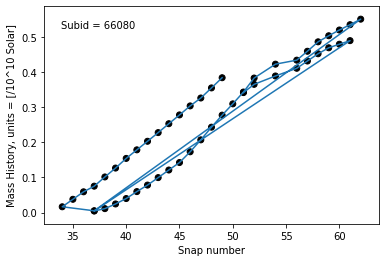

~~~~~Mergers~~~~~~
# = 3894
Snapnum [121 121 121 ... 134 134 134]
SubfindID [  41939   41259   41560 ...   79746 3119691   77271]


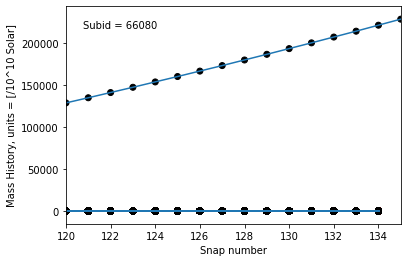

In [37]:
h = 0.7

with h5py.File(tree,'r') as t:
    snapnum = t['SnapNum'][:]
    mass = t['MassHistory'][:]
    subfindid = t['SubfindID'][:]

print(len(snapnum))
start = 15000
end = 15050

lower_snap = 120#was 60
upper_snap = 135#was 85
print(snapnum[start:end])
print(mass[start:end])

# Okay look for all places where snapnum switches over, this is when a merger happens
color_pt = []
merger_index = []
for j in range(len(snapnum)):
    if j==0:
        color_pt.append('black')
        continue
        #try:
    if (snapnum[j] - snapnum[j-1]) > 1 and snapnum[j] > lower_snap and snapnum[j] <upper_snap:
        #print(abs(snapnum[j+1] - snapnum[j]), snapnum[j], snapnum[j+1])
        color_pt.append('red')
        merger_index.append(j)
        #STOP
    else:
        color_pt.append('black')




plt.clf()
plt.plot(snapnum[start:end],(mass[start:end]*h))
plt.scatter(snapnum[start:end],(mass[start:end]*h), color=color_pt[start:end])
plt.annotate('Subid = '+str(sub['id']), xy=(0.05,0.9), xycoords='axes fraction')
plt.xlabel('Snap number')
plt.ylabel('Mass History, units = [/10^10 Solar]')
#plt.ylim([-0.004,0.004])
#plt.xlim([100,130])
plt.show()


print('~~~~~Mergers~~~~~~')
print('# = '+str(len(merger_index)))
#print('indices', merger_index)
print('Snapnum',snapnum[merger_index])
print('SubfindID', subfindid[merger_index])

# What if you just select the mergers between a certain range of redshifts, snapshots
# roughly correspond to redshifts 65 and 80 should do it?



plt.clf()
plt.plot(snapnum,(mass*h))
plt.scatter(snapnum,(mass*h), color=color_pt)
plt.annotate('Subid = '+str(sub['id']), xy=(0.05,0.9), xycoords='axes fraction')
plt.xlabel('Snap number')
plt.ylabel('Mass History, units = [/10^10 Solar]')
#plt.ylim([-0.004,0.004])
plt.xlim([lower_snap, upper_snap])
#plt.ylim([0,5e-8])
#snapshot 68 is z = 2.002
plt.show()

### The mass ratio of a merger is not taken at the moment of merging

In [69]:
# Use the below codes to find the number of mergers
numMergers(f, 1e-1,'stars')#was 1e-10


10

In [70]:
num_mergers, ratios, indices, snapnums = merger_info(f, 1e-1, 'stars')
#numMergers, ratio_list, index_list, snapnum_list

fpID 10000000105518489 rootID 10000000105518488
fp Index 1 fpID 10000000105518489
npID 10000000106146903
fp Index 2 fpID 10000000105518490
npID 10000000106134946
fp Index 3 fpID 10000000105518491
npID 10000000106124687
fp Index 4 fpID 10000000105518492
npID 10000000106111650
fp Index 5 fpID 10000000105518493
npID 10000000106102132
fp Index 6 fpID 10000000105518494
npID 10000000106089682
fp Index 7 fpID 10000000105518495
npID 10000000106078782
fp Index 8 fpID 10000000105518496
npID 10000000106066061
fp Index 9 fpID 10000000105518497
npID 10000000106056946
fp Index 10 fpID 10000000105518498
npID 10000000106046102
fp Index 11 fpID 10000000105518499
npID 10000000106033874
fp Index 12 fpID 10000000105518500
npID 10000000106023473
fp Index 13 fpID 10000000105518501
npID 10000000106011076
fp Index 14 fpID 10000000105518502
npID 10000000106001926
fp Index 15 fpID 10000000105518503
npID 10000000105991073
fp Index 16 fpID 10000000105518504
npID 10000000105980941
fp Index 17 fpID 1000000010551850

NameError: name 'STOP' is not defined

In [98]:
def partTypeNum(partType):
    """ Mapping between common names and numeric particle types. """
    if str(partType).isdigit():
        return int(partType)
        
    if str(partType).lower() in ['gas','cells']:
        return 0
    if str(partType).lower() in ['dm','darkmatter']:
        return 1
    if str(partType).lower() in ['tracer','tracers','tracermc','trmc']:
        return 3
    if str(partType).lower() in ['star','stars','stellar']:
        return 4 # only those with GFM_StellarFormationTime>0
    if str(partType).lower() in ['wind']:
        return 4 # only those with GFM_StellarFormationTime<0
    if str(partType).lower() in ['bh','bhs','blackhole','blackholes']:
        return 5
    
    raise Exception("Unknown particle type name.")
# This is code from Zephyr Penoyre
# used to create the simple.json file that has the merger id and snapnum
def returnSimpleTree(baseUrl, i, subhalo_id,snapshot_number):
    '''
    I think we first need the groupFile because we'll need to cross-list
    the subhalo ID with the subfind ID.
    '''
    '''r = get(baseUrl)
    sim = get( r['simulations'][i]['url'] )
    print(sim)
    print(sim['files'])
    print(str(sim['files'])+'offsets.'+str(snapshot_number)+'.hdf5')
    offsets = get( str(sim['files'])+'offsets.'+str(snapshot_number)+'.hdf5' )
    print(offsets)'''
    
    
    practice = get("http://www.tng-project.org/api/TNG100-1/files/offsets."+str(snapshot_number)+".hdf5")
    prac = h5py.File(practice,'r')
    print(prac.keys())
    print(prac['FileOffsets'])
    STOP
    
    
    
    '''# load sublink chunk offsets from header of first file
    groupFile=basePath+'groups_'+str(snapshot_number)+'/'+'groups_'+str(snapshot_number)+'.0.hdf5'
   
    #groupFile=basePath+'groups_0'+str(snapshot_number)+'/fof_subhalo_groups_0'+str(snapshot_number)+'.0.hdf5'
    file = h5py.File(groupFile, 'r')
    print(file.keys())
    print(file['Header'])'''
    #with h5py.File(offsets,'r') as file:
    subhaloFileOffsets = prac['FileOffsets']['Subhalo']
    treeFileOffsets = prac['FileOffsets']['SubLink']

    # calculate target group catalog file chunk which contains this id
    subhaloFileOffsets = int(subhalo_id) - subhaloFileOffsets
    fileNum = np.max( np.where(subhaloFileOffsets >= 0) )
    subhaloFile=basePath+'groups_'+str(snapshot_number)+'/'+'groups_'+str(snapshot_number)+'.'+str(fileNum)+'.hdf5'
    subhaloOffset=subhaloFileOffsets[fileNum]

    #finding the right file for this tree and where exactly to look
    with h5py.File(subhaloFile,'r') as groupFile:
        rowNum=groupFile["Offsets"]['Subhalo_SublinkRowNum'][subhaloOffset]
        lastProgId=groupFile["Offsets"]['Subhalo_SublinkLastProgenitorID'][subhaloOffset]
        subhaloId=groupFile["Offsets"]['Subhalo_SublinkSubhaloID'][subhaloOffset]

    treeFileOffsets=int(rowNum)-treeFileOffsets
    treeFileNum=np.max(np.where(treeFileOffsets >= 0))
    
    treeFile=basePath+'trees/SubLink/tree_extended.'+str(treeFileNum)+'.hdf5'
    rowStart = treeFileOffsets[treeFileNum]

    with h5py.File(treeFile,'r') as rawTree:
        #finding which entries in tree we're interested in
        firstId = rawTree['RootDescendantID'][rowStart]
        rowStart=rowStart+(firstId-subhaloID)
        lastId = rawTree['LastProgenitorID'][rowStart]
        rowEnd=rowStart+lastId-firstId+1

        nFind=rawTree['SubfindID'][rowStart:rowEnd]
        nSnap=rawTree['SnapNum'][rowStart:rowEnd]
        nSub=rawTree['SubhaloID'][rowStart:rowEnd]
        nFirst=rawTree['FirstProgenitorID'][rowStart:rowEnd]
        nNext=rawTree['NextProgenitorID'][rowStart:rowEnd]
        nDesc=rawTree['DescendantID'][rowStart:rowEnd]

    #initialises the tree
    thisTree=-1*np.ones((136,2),dtype=int)
    thisTree[:,0]=np.arange(135,-1,-1)

    #traces the tree back to the latest subhalo in the mpb
    zIndex=np.argwhere((nFind==subhalo_id) & (nSnap==snapshot_number))[0][0]
    thisIndex=zIndex
    if thisIndex!=0:
        descSub=nDesc[zIndex]
        thisSub=nSub[zIndex]
        descIndex=zIndex+descSub-nSub[zIndex]
        while ((nFirst[descIndex]==thisSub) & (nDesc[descIndex]!=-1)): #while the first progentior of each descendant is this subhalo
            descSub=nDesc[descIndex]
            thisSub=nSub[descIndex]
            descIndex=descIndex+descSub-nSub[descIndex]
            thisIndex=descIndex

    thisSnap=nSnap[thisIndex]
    thisFind=nFind[thisIndex]
    thisTree[135-thisSnap,1]=thisFind # records subfind id of first step

    #initialises the list of merging galaxies
    if thisSnap!=135: #if it doesn't reach z=0 records the subhalo it merges with
        descIndex=thisIndex+nDesc[thisIndex]-nSub[thisIndex]
        descSnap=nSnap[descIndex]
        descFind=nFind[descIndex]
        mergerTree=[[descSnap,descIndex]]
    else:
        mergerTree=[]


    while nFirst[thisIndex]!=-1: # goes through main progenitors
        thisIndex=thisIndex+nFirst[thisIndex]-nSub[thisIndex] #index of next main step in main progenitor branch

        thisSnap=nSnap[thisIndex] #snapshot of this main progenitor
        thisFind=nFind[thisIndex] #subfind id of this main progenitor
        thisTree[135-thisSnap,1]=thisFind # records subfind id of this main progenitor

        nextIndex=thisIndex+0 #stupid python objects
        while nNext[nextIndex]!=-1: # goes through merging halos (next progenitors)

            nextIndex=nextIndex+nNext[nextIndex]-nSub[nextIndex] #index of next progenitor

            #records details of these mergers
            mergerSnap=nSnap[nextIndex]
            mergerSub=nFind[nextIndex]
            mergerTree.append([mergerSnap,mergerSub])

    # got to the end of this branch, so must save it
    filled=np.argwhere(thisTree[:,1]!=-1) # finds the snapshots during which the halo is in the tree
    if filled.size==1:
        thisTree=thisTree[filled[0],:]
    elif thisTree[0,1]==-1: # if the tree doesn't make it to z=0
        thisTree=thisTree[filled[0][0]:filled[-1][0]+1,:]
    else:
        thisTree=thisTree[0:filled[-1][0]+1,:] # if it does

    mergerTree=np.array(mergerTree)
    data={"Main":thisTree}
    data['Mergers']=mergerTree
    return data



    
def merger_info(tree, minMassRatio, minmass, h,  massPartType, index=0):
    """ Calculate the number of mergers in this sub-tree (optionally above some mass ratio threshold). """
    # verify the input sub-tree has the required fields
    reqFields = ['SubhaloID', 'NextProgenitorID', 'MainLeafProgenitorID',
                 'FirstProgenitorID', 'SubhaloMassType']

    if not set(reqFields).issubset(tree.keys()):
        raise Exception('Error: Input tree needs to have loaded fields: '+', '.join(reqFields))

    numMergers   = 0
    invMassRatio = 1.0 / minMassRatio

    # walk back main progenitor branch
    rootID = tree['SubhaloID'][index]
    fpID   = tree['FirstProgenitorID'][index]
    
    print('fpID', fpID, 'rootID', rootID)
    
    
    ratio_list=[]
    index_list=[]
    snapnum_list=[]
    mass_1_list=[]
    mass_2_list=[]

    while fpID != -1:# it equals -1 when it is snapnum 135 (the last snapshot)
        # So when you begin this is simply 0 + (first progID - subhaloID) = 1
        fpIndex = index + (fpID - rootID)
        fpMass  = maxPastMass(tree, fpIndex, massPartType)
        
        
        
        # explore breadth
        npID = tree['NextProgenitorID'][fpIndex]
        ID = npID
        '''print('fp Index', fpIndex, 'fpID', fpID)
        print('npID', npID)'''
        
        # This actually needs to be the snapnum of the next progenitor
        npsnapnum = tree['SnapNum'][fpIndex]

        while npID != -1: # This means there is nothing else that merged
            npIndex = index + (npID - rootID)
            npMass  = maxPastMass(tree, npIndex, massPartType)
            
            # count if both masses are non-zero, and ratio exceeds threshold
            #if fpMass > 0.0 and npMass > 0.0:
            if fpMass*h > minmass and npMass*h > minmass:
                ratio = npMass / fpMass

                if ratio >= minMassRatio and ratio <= invMassRatio:
                    '''print('Merger', npID)
                    print('mass prog', npMass, 'mass fp', fpMass)'''
                    numMergers += 1
                    # Make a list for mass ratio and ids
                    ratio_list.append(ratio)
                    index_list.append(ID)
                    snapnum_list.append(npsnapnum)
                    mass_1_list.append(fpMass)
                    mass_2_list.append(npMass)
                    
                    

            npID = tree['NextProgenitorID'][npIndex]

        fpID = tree['FirstProgenitorID'][fpIndex]

    return numMergers, ratio_list, index_list, snapnum_list, mass_1_list, mass_2_list

def numMergers_nocut(tree, minMassRatio, massPartType, index=0):
    """ Calculate the number of mergers in this sub-tree (optionally above some mass ratio threshold). """
    # verify the input sub-tree has the required fields
    reqFields = ['SubhaloID', 'NextProgenitorID', 'MainLeafProgenitorID',
                 'FirstProgenitorID', 'SubhaloMassType']

    if not set(reqFields).issubset(tree.keys()):
        raise Exception('Error: Input tree needs to have loaded fields: '+', '.join(reqFields))

    numMergers   = 0
    invMassRatio = 1.0 / minMassRatio
    

    # walk back main progenitor branch
    '''print('lastprog', tree['LastProgenitorID'][index])
    print('rootdescendent', tree['RootDescendantID'][index])
    print('firstprog', tree['FirstProgenitorID'][index])
    print('nextprog', tree['NextProgenitorID'][index])
    print('how does this change with index', tree['FirstProgenitorID'])
    print('subhalo and snapnum', tree['SubhaloID'][index], tree['SnapNum'][index])
    print('mass dm only', tree['Mass'][index], 'mass history', tree['MassHistory'][index])
    STOP'''
    
    print('Starting with this galaxy', tree['SubhaloID'][index], tree['SnapNum'][index])
    
    rootID = tree['SubhaloID'][index]
    fpID   = tree['FirstProgenitorID'][index]
    
    merger_before = []
    merger_after = []
    merger_mass_ratio = []
    
    while fpID != -1:
        fpIndex = index + (fpID - rootID) # so when we are on the first first progenitor, 
        # you will only be adding a value of 1 to the index
        
        fpMass  = maxPastMass(tree, fpIndex, massPartType)

        # explore breadth
        npID = tree['NextProgenitorID'][fpIndex]

        while npID != -1:
            npIndex = index + (npID - rootID)
            npMass  = maxPastMass(tree, npIndex, massPartType)
            
            ratio = fpMass / npMass
            # count if both masses are non-zero, and ratio exceeds threshold
            
            if fpMass > 0.0 and npMass > 0.0:
                if ratio >= minMassRatio and ratio <= invMassRatio:
                    numMergers += 1
                    merger_before.append([tree['SubhaloID'][fpIndex], tree['SubhaloID'][npIndex], tree['SnapNum'][fpIndex]])
                    merger_after.append([tree['DescendantID'][fpIndex],tree['SnapNum'][fpIndex-1]])
                    merger_mass_ratio.append(fpMass/npMass)

                    '''print([tree['SubhaloID'][fpIndex], tree['SubhaloID'][npIndex], tree['SnapNum'][fpIndex]])
                    print([tree['DescendantID'][fpIndex],tree['SnapNum'][fpIndex-1]])
                    print(fpMass/npMass)
                    STOP'''

            npID = tree['NextProgenitorID'][npIndex]

        fpID = tree['FirstProgenitorID'][fpIndex]
        if fpID ==-1:
            print('we are at the end times', tree['SnapNum'][fpIndex-1])
            fpIndex+=1
            print('restarting a new branch', tree['SnapNum'][fpIndex-1],tree['FirstProgenitorID'][fpIndex])
            

    return numMergers, merger_before, merger_after, merger_mass_ratio

def numMergers(tree, minMassRatio, massPartType, index=0): # This is the number of mergers along the MPG,
    # probably best to do only one step back in time?
    # Since you are walking backward along the MPG and then checking for everything that merged
    # with that progenitor 
    """ Calculate the number of mergers in this sub-tree (optionally above some mass ratio threshold). """
    # verify the input sub-tree has the required fields
    reqFields = ['SubhaloID', 'NextProgenitorID', 'MainLeafProgenitorID',
                 'FirstProgenitorID', 'SubhaloMassType']

    if not set(reqFields).issubset(tree.keys()):
        raise Exception('Error: Input tree needs to have loaded fields: '+', '.join(reqFields))

    numMergers   = 0
    invMassRatio = 1.0 / minMassRatio

    # walk back main progenitor branch
    rootID = tree['SubhaloID'][index]
    fpID   = tree['FirstProgenitorID'][index] # one moment back in time

    while fpID != -1: # while there is a FP id...
        fpIndex = index + (fpID - rootID) # This will add one to the index (walking along the MPB)
        fpMass  = maxPastMass(tree, fpIndex, massPartType)

        # explore breadth
        npID = tree['NextProgenitorID'][fpIndex] # Now moving horizontally

        while npID != -1:
            npIndex = index + (npID - rootID)
            npMass  = maxPastMass(tree, npIndex, massPartType)

            # count if both masses are non-zero, and ratio exceeds threshold
            if fpMass > 0.0 and npMass > 0.0:
                ratio = npMass / fpMass

                if ratio >= minMassRatio and ratio <= invMassRatio:
                    numMergers += 1

            npID = tree['NextProgenitorID'][npIndex]

        fpID = tree['FirstProgenitorID'][fpIndex]

    return numMergers


def maxPastMass(tree, index, partType='stars'):
    """ Get maximum past mass (of the given partType) along the main branch of a subhalo
        specified by index within this tree. """
    # Uses partTypeNum to look up id for the particle type
    ptNum = partTypeNum(partType)

    # Finds the length of the branch, 'MainLeafProgenitorID' is the earliest progenitor along the main branch,
    # since the subhalo IDs increase by one along the main branch, this will give you the number of 
    # indices to increase by
    branchSize = tree['MainLeafProgenitorID'][index] - tree['SubhaloID'][index] + 1
    
    # Create a list of masses along the main branch
    masses = tree['SubhaloMassType'][index: index + branchSize, ptNum]
    
    # Find the max along the main branch, use this to determine mass ratio:
    return np.max(masses)


def maxPastMass_and_index(tree, index, partType='stars'):
    """ Get maximum past mass (of the given partType) along the main branch of a subhalo
        specified by index within this tree. """
    # Uses partTypeNum to look up id for the particle type
    index = int(index)
    ptNum = partTypeNum(partType)

    # Finds the length of the branch, 'MainLeafProgenitorID' is the earliest progenitor along the main branch,
    # since the subhalo IDs increase by one along the main branch, this will give you the number of 
    # indices to increase by
    branchSize = tree['MainLeafProgenitorID'][index] - tree['SubhaloID'][index] + 1
    
    # Create a list of masses along the main branch
    masses = tree['SubhaloMassType'][index: index + branchSize, ptNum]
    max_mass = np.max(masses)
    max_index = np.where(np.max(masses))
    print('max index', max_index)
    max_id = tree['SubhaloID'][index]
    print('max subhalo ID', max_id)
    max_snapnum = tree['Snapnum'][index]
    # Find the max along the main branch, use this to determine mass ratio:
    return max_mass, max_id, max_snapnum

print('compiled')

compiled


### Now, I want to be able to take a list of these and get some sort of image to check that this is right
I also need to check out how to get the mass ratio

In [27]:
# Get them images:
import matplotlib.image as mpimg
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import BytesIO ## for Python 3

#print('Snapnum',snapnum[merger_index])
#print('SubfindID', subfindid[merger_index])
snapnum = 
number =     snapnum[merger_index][0:6]
ids = subfindid[merger_index][0:6]
sub_count = 1
plt.figure(figsize=[15,3])

for j in range(len(ids)):
    url = "http://www.illustris-project.org/api/Illustris-1/snapshots/"+str(number[j])+"/subhalos/" + str(ids[j])
    sub = get(url)
    # it is of course possible this data product does not exist for all requested subhalos
    if 'stellar_mocks' in sub['supplementary_data']: 
        # download PNG image, the version which includes all stars in the FoF halo (try replacing 'fof' with 'gz')
        png_url = sub['supplementary_data']['stellar_mocks']['image_fof']
        response = get(png_url)
        # make plot a bit nicer
        plt.subplot(1,len(ids),sub_count)
        plt.text(0,-20,"ID="+str(id),color='blue')
        plt.gca().axes.get_xaxis().set_ticks([])
        plt.gca().axes.get_yaxis().set_ticks([])
        sub_count += 1

        # plot the PNG binary data directly, without actually saving a .png file
        file_object = BytesIO(response.content)
        plt.imshow(mpimg.imread(file_object))
plt.show()

NameError: name 'snapnum' is not defined

In [35]:
import illustris_python as ill
BASE_PATH_ILLUSTRIS_1 = "/n/ghernquist/Illustris/Runs/L75n1820FP"
#from illustris_python import ill, BASE_PATH_ILLUSTRIS_1
def test_numMergers():
    snap = 135
    ratio = 1.0/5.0
    start = 100

    # Values for Illustris-1, snap=135, start=100
    num_mergers = [2, 2, 3, 4, 3]

    group_first_sub = ill.groupcat.loadHalos("http://www.illustris-project.org/api/Illustris-1/snapshots/"+str(snap), 
                                             snap, fields=['GroupFirstSub'])

    # the following fields are required for the walk and the mass ratio analysis
    fields = ['SubhaloID', 'NextProgenitorID', 'MainLeafProgenitorID',
              'FirstProgenitorID', 'SubhaloMassType']
    for i, nm in zip(range(start, start+5), num_mergers):
        tree = ill.sublink.loadTree(BASE_PATH_ILLUSTRIS_1, snap, group_first_sub[i], fields=fields)
        _num_merg = ill.sublink.numMergers(tree, minMassRatio=ratio)
        print("group_first_sub[{}] = {}, num_mergers = {} (should be {})".format(
            i, group_first_sub[i], _num_merg, nm))
        assert_equal(_num_merg, nm)

    return


def maxPastMass(tree, index, partType='stars'):
    """ Get maximum past mass (of the given partType) along the main branch of a subhalo
        specified by index within this tree. """
    ptNum = partTypeNum(partType)

    branchSize = tree['MainLeafProgenitorID'][index] - tree['SubhaloID'][index] + 1
    masses = tree['SubhaloMassType'][index: index + branchSize, ptNum]
    return np.max(masses)


def numMergers(tree, minMassRatio=1e-10, massPartType='stars', index=0):
    """ Calculate the number of mergers in this sub-tree (optionally above some mass ratio threshold). """
    # verify the input sub-tree has the required fields
    reqFields = ['SubhaloID', 'NextProgenitorID', 'MainLeafProgenitorID',
                 'FirstProgenitorID', 'SubhaloMassType']

    if not set(reqFields).issubset(tree.keys()):
        raise Exception('Error: Input tree needs to have loaded fields: '+', '.join(reqFields))

    numMergers   = 0
    invMassRatio = 1.0 / minMassRatio

    # walk back main progenitor branch
    rootID = tree['SubhaloID'][index]
    fpID   = tree['FirstProgenitorID'][index]

    while fpID != -1:
        fpIndex = index + (fpID - rootID)
        fpMass  = maxPastMass(tree, fpIndex, massPartType)

        # explore breadth
        npID = tree['NextProgenitorID'][fpIndex]

        while npID != -1:
            npIndex = index + (npID - rootID)
            npMass  = maxPastMass(tree, npIndex, massPartType)

            # count if both masses are non-zero, and ratio exceeds threshold
            if fpMass > 0.0 and npMass > 0.0:
                ratio = npMass / fpMass

                if ratio >= minMassRatio and ratio <= invMassRatio:
                    numMergers += 1

            npID = tree['NextProgenitorID'][npIndex]

        fpID = tree['FirstProgenitorID'][fpIndex]

    return numMergers

In [36]:
test_numMergers()

OSError: Unable to open file (unable to open file: name = 'http://www.illustris-project.org/api/Illustris-1/snapshots/135/groups_135/fof_subhalo_tab_135.0.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
# Okay now plot the snapshot for the above before and after case :)
#['snap','id','mass_gas','mass_stars','mass_dm','mass_bhs']
print(r['snap'], r['id'])

ids = r['id']
snaps = r['snap']

# it is of course possible this data product does not exist for all requested subhalos
for j in range(len(ids)):
    idj = ids[j]
    snap = snaps[j]
    print('id', idj, 'snap', snap)
    url = "http://www.illustris-project.org/api/Illustris-1/snapshots/"+str(snap)+"/subhalos/" + str(idj)
    sub = get(url)
    if 'stellar_mocks' in sub['supplementary_data']: 
        # download PNG image, the version which includes all stars in the FoF halo (try replacing 'fof' with 'gz')
        
        print(sub['supplementary_data'])
        try:
            png_url = sub['supplementary_data']['stellar_mocks']['image_fof']
            response = get(png_url)
            # make plot a bit nicer
            plt.subplot(1,len(ids),sub_count)
            plt.text(0,-20,"ID="+str(id),color='blue')
            plt.gca().axes.get_xaxis().set_ticks([])
            plt.gca().axes.get_yaxis().set_ticks([])
            sub_count += 1

            # plot the PNG binary data directly, without actually saving a .png file
            file_object = BytesIO(response.content)
            plt.imshow(mpimg.imread(file_object))
            plt.show()
        except:
            fits_url = sub['supplementary_data']['stellar_mocks']['fits']
            response = get(png_url)
            file_object = BytesIO(response.content)
            plt.imshow(mpimg.imread(file_object))
            plt.show()
plt.show()       

http://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/41092/stellar_mocks/image_fof.png
http://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/338375/stellar_mocks/image_fof.png
http://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/257378/stellar_mocks/image_fof.png
http://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/110568/stellar_mocks/image_fof.png
http://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/260067/stellar_mocks/image_fof.png


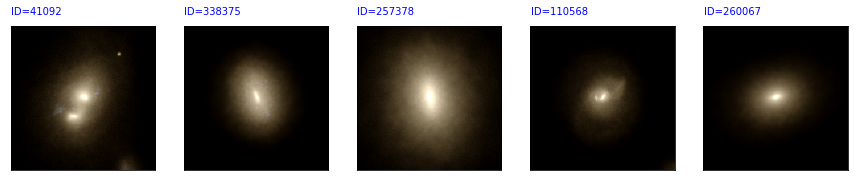

In [43]:
# Get them images:
import matplotlib.image as mpimg
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import BytesIO ## for Python 3

ids = [41092,338375,257378,110568,260067]
sub_count = 1
plt.figure(figsize=[15,3])

for id in ids:
    url = "http://www.illustris-project.org/api/Illustris-1/snapshots/135/subhalos/" + str(id)
    sub = get(url)
    # it is of course possible this data product does not exist for all requested subhalos
    if 'stellar_mocks' in sub['supplementary_data']: 
        print(sub['supplementary_data']['stellar_mocks']['image_fof'])
        
        # download PNG image, the version which includes all stars in the FoF halo (try replacing 'fof' with 'gz')
        png_url = sub['supplementary_data']['stellar_mocks']['image_fof']
        response = get(png_url)
        # make plot a bit nicer
        plt.subplot(1,len(ids),sub_count)
        plt.text(0,-20,"ID="+str(id),color='blue')
        plt.gca().axes.get_xaxis().set_ticks([])
        plt.gca().axes.get_yaxis().set_ticks([])
        sub_count += 1

        # plot the PNG binary data directly, without actually saving a .png file
        file_object = BytesIO(response.content)
        plt.imshow(mpimg.imread(file_object))

In [50]:
# Get them images:
import matplotlib.image as mpimg
try:
    from StringIO import StringIO ## for Python 2
except ImportError:
    from io import BytesIO ## for Python 3

ids = [0,100,200,300]
sub_count = 1
plt.figure(figsize=[15,3])

for id in ids:
    url = "http://www.tng-project.org/api/TNG100-1/snapshots/99/subhalos/" + str(id)
    
    sub = get(url)
    print(sub)
    STOP
    # it is of course possible this data product does not exist for all requested subhalos
    if 'stellar_mocks' in sub['supplementary_data']: 
        # download PNG image, the version which includes all stars in the FoF halo (try replacing 'fof' with 'gz')
        png_url = sub['supplementary_data']['stellar_mocks']['image_fof']
        response = get(png_url)
        # make plot a bit nicer
        plt.subplot(1,len(ids),sub_count)
        plt.text(0,-20,"ID="+str(id),color='blue')
        plt.gca().axes.get_xaxis().set_ticks([])
        plt.gca().axes.get_yaxis().set_ticks([])
        sub_count += 1

        # plot the PNG binary data directly, without actually saving a .png file
        file_object = BytesIO(response.content)
        plt.imshow(mpimg.imread(file_object))
    else:
        if 'galaxy_stellar_light' in sub['vis']:
            
            png_url = sub['vis']['galaxy_stellar_light']
            print(png_url)
            response = get(png_url)
            # make plot a bit nicer
            plt.subplot(1,len(ids),sub_count)
            plt.text(0,-20,"ID="+str(id),color='blue')
            plt.gca().axes.get_xaxis().set_ticks([])
            plt.gca().axes.get_yaxis().set_ticks([])
            sub_count += 1

            # plot the PNG binary data directly, without actually saving a .png file
            #print(response)
            #file_object = BytesIO(response)
            plt.imshow(mpimg.imread(response))
            plt.show()
            STOP
        else:  
            print(sub)
            STOP

{'snap': 99, 'id': 0, 'bhmdot': 0.00039801, 'cm_x': 832.387, 'cm_y': 26368.5, 'cm_z': 18060.8, 'gasmetallicity': 0.0077182, 'gasmetallicityhalfrad': 0.00799488, 'gasmetallicitymaxrad': 0.0056164, 'gasmetallicitysfr': 0.00668848, 'gasmetallicitysfrweighted': 0.00668008, 'pos_x': 849.091, 'pos_y': 26327.0, 'pos_z': 18306.9, 'halfmassrad': 607.966, 'halfmassrad_gas': 627.311, 'halfmassrad_dm': 610.31, 'halfmassrad_stars': 47.3881, 'halfmassrad_bhs': 0.0, 'len': 88772413, 'len_gas': 38648183, 'len_dm': 46136876, 'len_stars': 3987343, 'len_bhs': 11, 'mass': 27477.9, 'mass_gas': 3900.6, 'mass_dm': 23325.6, 'mass_stars': 251.016, 'mass_bhs': 0.701811, 'massinhalfrad': 555.356, 'massinhalfrad_gas': 13.5311, 'massinhalfrad_dm': 415.619, 'massinhalfrad_stars': 125.508, 'massinhalfrad_bhs': 0.697652, 'massinmaxrad': 7611.22, 'massinmaxrad_gas': 870.236, 'massinmaxrad_dm': 6518.97, 'massinmaxrad_stars': 221.317, 'massinmaxrad_bhs': 0.6981, 'massinrad': 1549.87, 'massinrad_gas': 80.1219, 'massinrad

NameError: name 'STOP' is not defined

<Figure size 1080x216 with 0 Axes>